<a href="https://colab.research.google.com/github/ruus77/data_analysis/blob/main/Backtesting_on_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px

In [56]:
tickers = "SPY QQQ TLT AAPL MSFT GOOG AMZN NFLX NVDA ADBE"
data = yf.download(
    tickers=tickers,
    period="max",
    interval="1d",
    ignore_tz=True,
    auto_adjust=True,
  #  group_by=tickers
)

[*********************100%***********************]  10 of 10 completed


In [57]:
data.head()

Price          Close                                            ...  \
Ticker          AAPL ADBE AMZN GOOG MSFT NFLX NVDA QQQ SPY TLT  ...   
Date                                                            ...   
1980-12-12  0.098485  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  ...   
1980-12-15  0.093347  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  ...   
1980-12-16  0.086495  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  ...   
1980-12-17  0.088636  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  ...   
1980-12-18  0.091206  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  ...   

Price          Volume                                            
Ticker           AAPL ADBE AMZN GOOG MSFT NFLX NVDA QQQ SPY TLT  
Date                                                             
1980-12-12  469033600  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-15  175884800  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-16  105728000  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-17   86441600  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-18   73449600  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  

[5 rows x 50 columns]

In [58]:
data = data["Close"]

In [59]:
data.head()

Ticker,AAPL,ADBE,AMZN,GOOG,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,
1980-12-12,0.098485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.093347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.086495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.088636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.091206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data[data.notnull().all(1)]

Ticker,AAPL,ADBE,AMZN,GOOG,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,
2004-08-19,0.460959,22.649828,1.931500,2.482147,16.744204,2.264286,0.089091,28.519308,73.969131,43.738750
2004-08-20,0.462310,23.029572,1.975500,2.679304,16.793587,2.262857,0.094363,28.807281,74.488289,43.698326
2004-08-23,0.466513,22.799728,1.972500,2.706267,16.867901,2.272857,0.096426,28.875059,74.299515,43.445919
2004-08-24,0.479572,22.849693,1.952500,2.594207,16.867901,2.208571,0.092835,28.866589,74.400627,43.471107
2004-08-25,0.496083,23.104523,2.015000,2.622160,17.059868,2.238571,0.096808,29.264690,74.906311,43.622597
...,...,...,...,...,...,...,...,...,...,...
2025-09-08,237.880005,358.660004,235.839996,234.160004,498.200012,1244.760010,168.300507,578.869995,648.830017,89.739998
2025-09-09,234.350006,354.059998,238.240005,239.940002,498.410004,1263.250000,170.750366,580.510010,650.330017,89.230003
2025-09-10,226.789993,350.160004,230.330002,239.559998,500.369995,1247.709961,177.320007,580.700012,652.210022,89.739998


In [61]:
data = data["20040901":]

In [62]:
ticker = "SPY"
close_adj = data[[ticker]].copy()
close_adj.columns = ["close"]
close_adj.head()
close_adj.dropna()

close_adj = close_adj["19930201":]
close_adj.head()

,close
Date,
2004-09-01,75.054626
2004-09-02,75.904182
2004-09-03,75.594002
2004-09-07,76.092941
2004-09-08,75.904182


In [63]:
close_adj["R"] = (close_adj["close"] / close_adj["close"].shift()) - 1
close_adj = close_adj.fillna(0)
close_adj.head()

,close,R
Date,,
2004-09-01,75.054626,0.000000
2004-09-02,75.904182,0.011319
2004-09-03,75.594002,-0.004086
2004-09-07,76.092941,0.006600
2004-09-08,75.904182,-0.002481


In [64]:
close_adj.index = pd.to_datetime(close_adj.index)

In [65]:
close_adj["slow_ma"] = close_adj.close.rolling(window=200).mean()
close_adj["fast_ma"] = close_adj.close.rolling(window=10).mean()
close_adj.sample(10)

,close,R,slow_ma,fast_ma
Date,,,,
2013-08-01,138.368362,0.011558,123.601795,137.097052
2013-02-22,121.959274,0.009772,112.291504,121.970538
2012-06-11,103.678398,-0.012697,101.274002,103.417233
2012-01-12,101.733467,0.002399,97.948485,100.424018
2009-07-21,71.388252,0.004626,64.502642,68.425740
2014-03-12,153.412064,0.000267,141.394951,153.308057
2020-02-26,287.084320,-0.003679,278.609644,304.516809
2023-09-14,438.683624,0.008622,404.532054,436.256265
2021-07-07,410.558899,0.003534,361.070271,405.312335


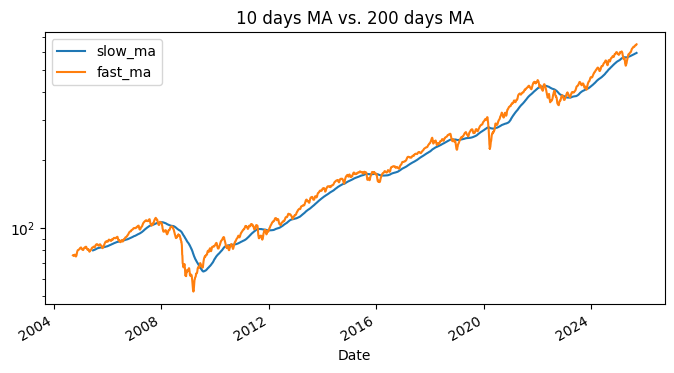

In [66]:
close_adj[["slow_ma", "fast_ma"]].plot(kind="line", logy = True, figsize=(8,4), title="10 days MA vs. 200 days MA");

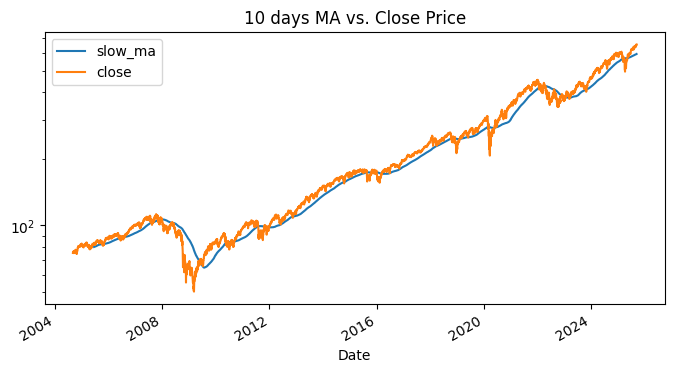

In [67]:
close_adj[["slow_ma", "close"]].plot(kind="line", logy = True, figsize=(8,4), title="10 days MA vs. Close Price");

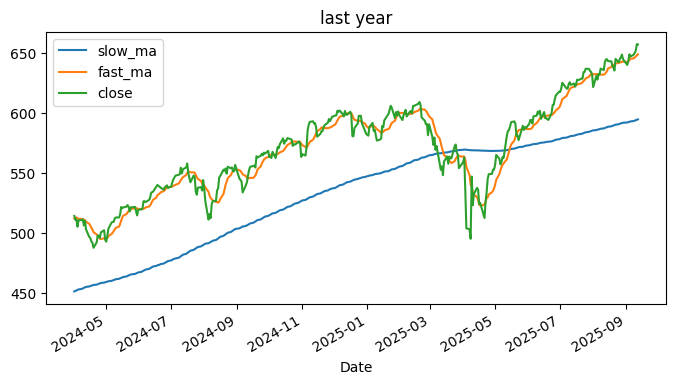

In [68]:
close_adj[["slow_ma",
           "fast_ma",
           "close"]].tail(365).plot(kind="line",
                                    figsize=(8,4),
                                    title="last year");

In [69]:
close_adj = close_adj[close_adj.notnull().all(1)]

In [70]:
close_adj.head()

,close,R,slow_ma,fast_ma
Date,,,,
2005-06-16,83.149796,0.002559,79.922770,82.522441
2005-06-17,83.457893,0.003705,79.964786,82.638863
2005-06-20,83.485397,0.000330,80.002692,82.765572
2005-06-21,83.533585,0.000577,80.042390,82.890931
2005-06-22,83.602318,0.000823,80.079937,83.038232


In [71]:
close_adj = close_adj.assign(
    signal = lambda x: np.where(x.fast_ma > x.slow_ma, 1, 0)
)
close_adj.signal = close_adj.signal.shift(1, fill_value=0)
close_adj.signal.head(5)

,signal
Date,
2005-06-16,0
2005-06-17,1
2005-06-20,1
2005-06-21,1
2005-06-22,1


In [72]:
close_adj.signal.value_counts()

,count
signal,
1,4019
0,1074


In [73]:
close_adj.columns

Index(['close', 'R', 'slow_ma', 'fast_ma', 'signal'], dtype='object')

In [74]:
close_adj["R_strategy"] = close_adj.R * close_adj.signal

In [75]:
close_adj.sample(5)

,close,R,slow_ma,fast_ma,signal,R_strategy
Date,,,,,,
2007-03-01,99.356880,-0.002980,94.516538,101.883405,1,-0.002980
2024-02-21,487.997925,0.000906,437.792053,489.434793,1,0.000906
2023-09-07,433.316528,-0.003070,403.238708,434.596454,1,-0.003070
2018-12-18,229.378342,-0.001096,246.568896,236.824028,0,-0.000000
2016-12-02,190.155472,0.000501,181.579575,190.646260,1,0.000501


In [76]:
def get_signal(data, ticker, fast_ma, slow_ma):
  close_adj = data[[ticker]].copy()
  close_adj.columns = ["close"]

  close_adj["R"] = (close_adj["close"] / close_adj["close"].shift()) - 1
  close_adj = close_adj.fillna(0)

  close_adj["slow_ma"] = close_adj.close.rolling(window=slow_ma).mean()
  close_adj["fast_ma"] = close_adj.close.rolling(window=fast_ma).mean()
  close_adj = close_adj[close_adj.notnull().all(1)]

  close_adj = close_adj.assign(
    signal = lambda x: np.where(x.fast_ma > x.slow_ma, 1, 0)
  )
  close_adj.signal = close_adj.signal.shift(1, fill_value=0)

  close_adj["R_strategy"] = close_adj.R * close_adj.signal

  return close_adj

In [77]:
TICKER = "SPY"
df_signal = get_signal(data=data,
                       ticker=TICKER,
                       fast_ma=10,
                       slow_ma=65)
df_signal.sample(5)

,close,R,slow_ma,fast_ma,signal,R_strategy
Date,,,,,,
2013-09-19,140.070984,-0.001676,134.945476,137.623242,1,-0.001676
2009-07-21,71.388252,0.004626,67.554334,68.425740,1,0.004626
2020-11-06,327.345490,-0.000228,316.660536,315.132639,0,-0.000000
2020-02-20,310.539581,-0.004108,297.301879,309.684329,1,-0.004108
2005-04-07,81.670387,0.005397,81.362051,80.698483,0,0.000000


In [78]:
df_signal.signal.value_counts(), close_adj.signal.value_counts()

(signal
 1    3782
 0    1446
 Name: count, dtype: int64,
 signal
 1    4019
 0    1074
 Name: count, dtype: int64)

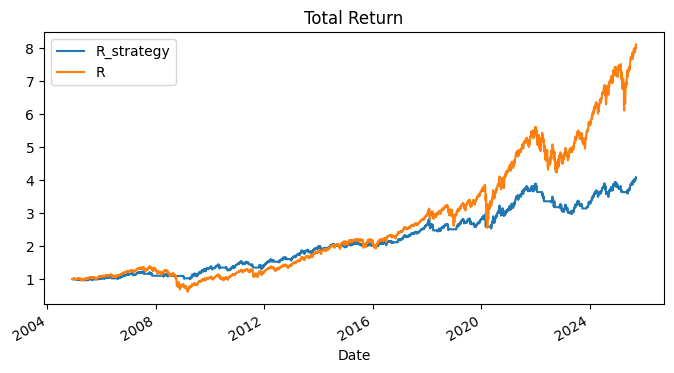

In [79]:
(1 + df_signal[["R_strategy", "R"]]).cumprod().plot(kind="line",
                                                    figsize=(8,4),
                                                    title="Total Return",);

In [80]:
from math import sqrt
def performence(df_signal,
                ticker,
                freq="M",
                risk_free_rate=0.02):
  rets = df_signal[["R", "R_strategy"]].copy()
  rets.columns = ["Buy & Hold", "Strategy"]

  if freq=="D":
    scale=252
  elif freq =="M":
    scale=12
    rets = rets.resample(freq).agg(lambda x: (1+x).prod() - 1)
  else:
    return None
  # Compute Results
  ret_cumulative = (1 + rets).cumprod()
  prev_peaks = ret_cumulative.cummax()
  drawdown = (ret_cumulative - prev_peaks) / prev_peaks

  # compute annualized returns and risk
  annualized_returns = (1 + rets.mean())**scale - 1
  annualized_std = (1 + rets.std())*np.sqrt(scale)
  max_drawdown = drawdown.min()*-1

  df_risk_return = pd.DataFrame(
      dict(
      ticker=ticker,
     annualized_returns=annualized_returns,
      annualized_std=annualized_std
          )
  )
  df_risk_return["max_drawdown"] = drawdown.min()*-1
  df_risk_return=df_risk_return.assign(
      sharp_ratio = lambda x:(x.annualized_returns - risk_free_rate)/x.annualized_std,
      calmar_ratio=lambda x:(x.annualized_returns)/x["max_drawdown"],

  )
  return df_risk_return



In [81]:
TICKER_1 = "SPY"
df_signal_1 = get_signal(data=data,
                       ticker=TICKER_1,
                       fast_ma=10,
                       slow_ma=65)

TICKER_2 = "QQQ"
df_signal_2 = get_signal(data=data,
                       ticker=TICKER_2,
                       fast_ma=10,
                       slow_ma=65)


performence_1 = performence(df_signal_1,
                ticker=TICKER_1,
                freq="D",
                risk_free_rate=0.02)
performence_2 = performence(df_signal_2,
                ticker=TICKER_2,
                freq="D",
                risk_free_rate=0.02)

perf = pd.concat([performence_1, performence_2],
                 axis=0)
perf

,ticker,annualized_returns,annualized_std,max_drawdown,sharp_ratio,calmar_ratio
Buy & Hold,SPY,0.126600,16.065562,0.551895,0.006635,0.229391
Strategy,SPY,0.077040,15.986763,0.235773,0.003568,0.326753
Buy & Hold,QQQ,0.174718,16.091210,0.534040,0.009615,0.327163
Strategy,QQQ,0.091198,16.015962,0.331903,0.004445,0.274772


In [82]:
results = []
for fast_ma in range(5, 30, 5):
  for slow_ma in range(30, 300, 5):
    if fast_ma >=slow_ma:
      continue
    else:
      df_signal = get_signal(data, ticker, fast_ma, slow_ma)

      perf = performence(df_signal, ticker, freq="D", risk_free_rate=0.02)

      perf["slow_ma"] = slow_ma
      perf["fast_ma"] = fast_ma

      results.append(perf.tail(1))

In [83]:
df_res = pd.concat(results)
df_res.sort_values("calmar_ratio", ascending=False).head()

,ticker,annualized_returns,annualized_std,max_drawdown,sharp_ratio,calmar_ratio,slow_ma,fast_ma
Strategy,SPY,0.098279,15.987795,0.193438,0.004896,0.508067,95,10
Strategy,SPY,0.096710,15.988390,0.193054,0.004798,0.500951,85,10
Strategy,SPY,0.100488,15.993586,0.202588,0.005033,0.496023,200,10
Strategy,SPY,0.100745,15.988572,0.204490,0.005050,0.492662,75,10
Strategy,SPY,0.106298,15.994157,0.217097,0.005396,0.489635,170,15
